In [1]:
##  Importing libraries for various operations

import numpy as np                    # for numpy matrices
import pandas as pd                   # for dataframe operations
import matplotlib.pyplot as plt       #for plotting
import seaborn as sns                 ##for plotting

In [2]:
%matplotlib inline   

# Data Preparation

In [3]:
## Reading the dataset i.e. train and test
 
trn=pd.read_csv("Training_data.csv")
tst=pd.read_csv("Testing_data.csv")

In [4]:
trn.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
0,45,Private,234652,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
1,43,State-gov,33331,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,70,United-States,>50K
2,26,State-gov,252284,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
3,24,Private,303296,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Laos,<=50K
4,45,Private,155093,10th,6,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,<=50K


In [5]:
trn.dtypes    ## check datatypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
Y                 object
dtype: object

In [6]:
## checking null values in numeric columns

print(trn["age"].isnull().sum())
print(trn["fnlwgt"].isnull().sum())
print(trn["education.num"].isnull().sum())
print(trn["capital.gain"].isnull().sum())
print(trn["capital.loss"].isnull().sum())
print(trn["hours.per.week"].isnull().sum())

0
0
0
0
0
0


In [7]:
## checking the shape

trn.shape,tst.shape

((26048, 15), (6513, 15))

In [8]:
trn.columns, tst.columns

(Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
        'marital.status', 'occupation', 'relationship', 'race', 'sex',
        'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
        'Y'],
       dtype='object'),
 Index(['Row_id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
        'marital.status', 'occupation', 'relationship', 'race', 'sex',
        'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
       dtype='object'))

In [9]:
## ROW ID COLUMN

del tst['Row_id'] ## deleting row id col coz its useless and has no significance on dependent variable

In [10]:
#WORKCLASS COLUMN

## checking the unique values present 

trn['workclass'].value_counts()

 Private             18156
 Self-emp-not-inc     2009
 Local-gov            1658
 ?                    1470
 State-gov            1048
 Self-emp-inc          908
 Federal-gov           784
 Without-pay             9
 Never-worked            6
Name: workclass, dtype: int64

In [11]:
##WORKCLASS COLUMN ON TRAIN AND TEST BOTH

trn['workclass']=trn['workclass'].str.strip()  ## removing the spaces from both the sides of unique values

In [12]:
trn.loc[trn['workclass']=='Never-worked','workclass']='Without-pay'   ## coz frequency of never worked is very low, so we can combine never worked with without pay

In [13]:
abc=pd.get_dummies(trn['workclass'],prefix='workclass',drop_first=True)      ## getting dummies of unique values
del trn['workclass']              
trn=pd.concat([trn,abc],axis=1)                                               ## adding dummies dataframe to main data

In [14]:
## same operations with test data

tst['workclass']=tst['workclass'].str.strip()

In [15]:
tst.loc[tst['workclass']=='Never-worked','workclass']='Without-pay'

In [16]:
tabc=pd.get_dummies(tst['workclass'],prefix='workclass',drop_first=True)
del tst['workclass']
tst=pd.concat([tst,tabc],axis=1)

In [17]:
### Cheking EDUCATION AND EDUCATION NUM column

print(trn['education'].value_counts())
#tst['education'].value_counts()


 HS-grad         8409
 Some-college    5810
 Bachelors       4284
 Masters         1396
 Assoc-voc       1114
 11th             958
 Assoc-acdm       823
 10th             752
 7th-8th          518
 Prof-school      465
 9th              410
 12th             344
 Doctorate        334
 5th-6th          261
 1st-4th          135
 Preschool         35
Name: education, dtype: int64


In [18]:
trn['education.num'].value_counts()

9     8409
10    5810
13    4284
14    1396
11    1114
7      958
12     823
6      752
4      518
15     465
5      410
8      344
16     334
3      261
2      135
1       35
Name: education.num, dtype: int64

In [19]:
del trn['education.num']   ## coz both education and education are same so we can delete anyone column

In [20]:
del tst['education.num']   ## deleting in test data

In [21]:
## getting dummies and merging dataframe with main dataframe. same opeartion on both train and test data

ab=pd.get_dummies(trn['education'],prefix='education',drop_first=True)
trn=pd.concat([trn,ab],axis=1)
del trn['education']

tab=pd.get_dummies(tst['education'],prefix='education',drop_first=True)
tst=pd.concat([tst,tab],axis=1)
del tst['education']

In [22]:
trn.shape,tst.shape

((26048, 34), (6513, 33))

In [23]:
trn.dtypes

age                            int64
fnlwgt                         int64
marital.status                object
occupation                    object
relationship                  object
race                          object
sex                           object
capital.gain                   int64
capital.loss                   int64
hours.per.week                 int64
native.country                object
Y                             object
workclass_Federal-gov          uint8
workclass_Local-gov            uint8
workclass_Private              uint8
workclass_Self-emp-inc         uint8
workclass_Self-emp-not-inc     uint8
workclass_State-gov            uint8
workclass_Without-pay          uint8
education_ 11th                uint8
education_ 12th                uint8
education_ 1st-4th             uint8
education_ 5th-6th             uint8
education_ 7th-8th             uint8
education_ 9th                 uint8
education_ Assoc-acdm          uint8
education_ Assoc-voc           uint8
e

In [24]:
## since relationship and race has no correlation with dependent variable so we can delete those columns

del trn['relationship']
del trn['race']
del tst['relationship']
del tst['race']

In [25]:
trn['native.country'].value_counts()

 United-States                 23315
 Mexico                          511
 ?                               468
 Philippines                     154
 Germany                         112
 Canada                           95
 Puerto-Rico                      93
 El-Salvador                      86
 Cuba                             82
 India                            80
 England                          71
 China                            66
 South                            65
 Jamaica                          64
 Italy                            59
 Dominican-Republic               58
 Vietnam                          56
 Columbia                         51
 Guatemala                        49
 Japan                            48
 Taiwan                           46
 Poland                           44
 Haiti                            38
 Portugal                         33
 Iran                             33
 Peru                             27
 France                           26
 

In [26]:
## native country of an individual doesnt affect on income of a person so dropping that column as well

del trn['native.country']
del tst['native.country']

In [27]:
## SEX COLUMN

trn['sex'].value_counts()

 Male      17363
 Female     8685
Name: sex, dtype: int64

In [28]:
## sex col has two unique values so taking dummies and adding the dummies dataframe with main dataframe and same ops is done on train and test both

mf=pd.get_dummies(trn['sex'],prefix='sex')
trn=pd.concat([trn,mf],axis=1)
del trn['sex']

tmf=pd.get_dummies(tst['sex'],prefix='sex')
tst=pd.concat([tst,tmf],axis=1)
del tst['sex']

In [29]:
## MARITAL STATUS COLUMN

trn['marital.status'].value_counts()  ## checking unique values and their counts

 Married-civ-spouse       11899
 Never-married             8651
 Divorced                  3544
 Separated                  825
 Widowed                    779
 Married-spouse-absent      333
 Married-AF-spouse           17
Name: marital.status, dtype: int64

In [30]:
trn['marital.status']=trn['marital.status'].str.strip()  ##since there is spaces between uniwue values so we have to strip it means remove those spaces

In [31]:
## never married, divorced , separated and widowed can be combined together and consider as single

trn.loc[trn['marital.status']=='Never-married','marital.status']= 'Single'
trn.loc[trn['marital.status']=='Divorced','marital.status']= 'Single'
trn.loc[trn['marital.status']=='Separated','marital.status']= 'Single'
trn.loc[trn['marital.status']=='Widowed','marital.status']= 'Single'

In [32]:
## same ops with test data as well

tst['marital.status']=tst['marital.status'].str.strip()

In [33]:
tst.loc[tst['marital.status']=='Never-married','marital.status']= 'Single'
tst.loc[tst['marital.status']=='Divorced','marital.status']= 'Single'
tst.loc[tst['marital.status']=='Separated','marital.status']= 'Single'
tst.loc[tst['marital.status']=='Widowed','marital.status']= 'Single'

In [34]:
vs=pd.get_dummies(trn['marital.status'],prefix='marital.status',drop_first=True)
trn=pd.concat([trn,vs],axis=1)
del trn['marital.status']

tvs=pd.get_dummies(tst['marital.status'],prefix='marital.status',drop_first=True)
tst=pd.concat([tst,tvs],axis=1)
del tst['marital.status']

In [35]:
trn.shape,tst.shape

((26048, 34), (6513, 33))

In [36]:
trn.dtypes

age                                      int64
fnlwgt                                   int64
occupation                              object
capital.gain                             int64
capital.loss                             int64
hours.per.week                           int64
Y                                       object
workclass_Federal-gov                    uint8
workclass_Local-gov                      uint8
workclass_Private                        uint8
workclass_Self-emp-inc                   uint8
workclass_Self-emp-not-inc               uint8
workclass_State-gov                      uint8
workclass_Without-pay                    uint8
education_ 11th                          uint8
education_ 12th                          uint8
education_ 1st-4th                       uint8
education_ 5th-6th                       uint8
education_ 7th-8th                       uint8
education_ 9th                           uint8
education_ Assoc-acdm                    uint8
education_ As

In [37]:
##OCCUPATION COLUMN

trn['occupation'].value_counts()

 Prof-specialty       3316
 Exec-managerial      3274
 Craft-repair         3248
 Adm-clerical         3036
 Sales                2898
 Other-service        2629
 Machine-op-inspct    1584
 ?                    1476
 Transport-moving     1297
 Handlers-cleaners    1119
 Farming-fishing       785
 Tech-support          742
 Protective-serv       518
 Priv-house-serv       119
 Armed-Forces            7
Name: occupation, dtype: int64

In [38]:
## removing spaces, combining low frequency values to a single frequency, getting dummies and add that dataframe with main dataframe

trn['occupation']=trn['occupation'].str.strip()
tst['occupation']=tst['occupation'].str.strip()

In [39]:
trn.loc[trn['occupation']=='Armed-Forces','occupation']='Other-service'
tst.loc[tst['occupation']=='Armed-Forces','occupation']='Other-service'

In [40]:
vss=pd.get_dummies(trn['occupation'],prefix='occupation',drop_first=True)
trn=pd.concat([trn,vss],axis=1)
del trn['occupation']

tvss=pd.get_dummies(tst['occupation'],prefix='occupation',drop_first=True)
tst=pd.concat([tst,tvss],axis=1)
del tst['occupation']

In [41]:
##TARGET COLUMN Y

trn['Y'].value_counts()

 <=50K    19775
 >50K      6273
Name: Y, dtype: int64

In [42]:
trn['Y'].isnull().sum()   ## checking null values

0

In [43]:
trn['Y']=trn['Y'].str.strip()

In [44]:
##1st method for replacing values

salary={'<=50K':0,'>50K':1}
trn.Y=[salary[item] for item in trn.Y]

In [45]:
## 2nd method for replacing values
trn.loc[trn['Y']=='<=50K','Y']= 0
trn.loc[trn['Y']=='>50K','Y']='1'

In [46]:
trn['Y']=pd.to_numeric(trn['Y'])  ## converting into numeric values since y column has string values

<Figure size 1440x720 with 0 Axes>

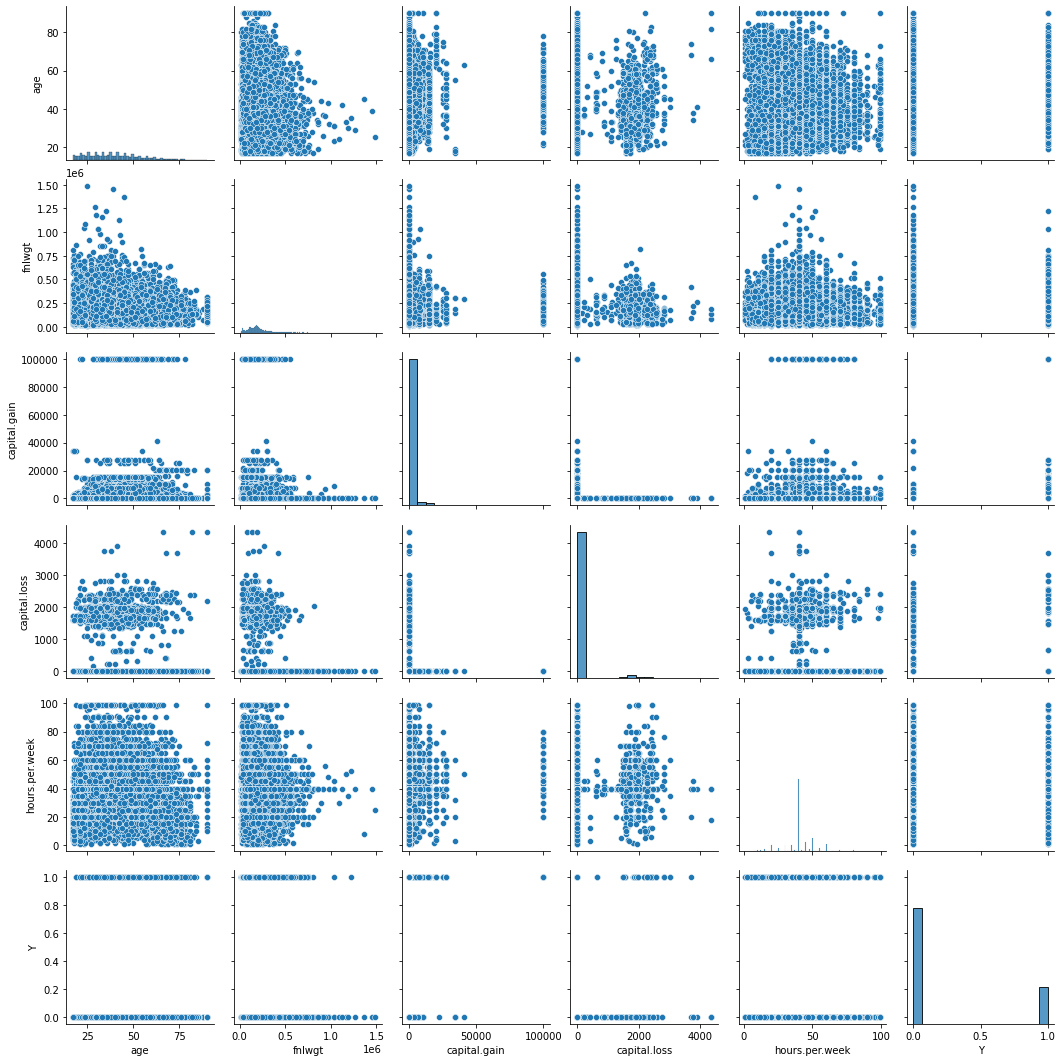

In [47]:
## seeing the correlation between main columns using matplotlib and seaborn libraries

plt.figure(figsize=(20,10))
sns.pairplot(data=trn[['age','fnlwgt','capital.gain','capital.loss','hours.per.week','Y']])

In [48]:
trn[['age','fnlwgt','capital.gain','capital.loss','hours.per.week','Y']].corr()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,Y
age,1.000000,-0.082397,0.084105,0.059287,0.072872,0.237956
fnlwgt,-0.082397,1.000000,0.001296,-0.007527,-0.019564,-0.017945
capital.gain,0.084105,0.001296,1.000000,-0.031684,0.083619,0.226074
capital.loss,0.059287,-0.007527,-0.031684,1.000000,0.061976,0.144632
hours.per.week,0.072872,-0.019564,0.083619,0.061976,1.000000,0.233560
Y,0.237956,-0.017945,0.226074,0.144632,0.233560,1.000000


In [49]:
##FNLWGT COLUMN

##since correlation between fnlwgt and target column Y and fnlwgt with other independent features is very low , we can delete that column

del trn['fnlwgt']

In [50]:
del tst['fnlwgt']

In [51]:
trn.head()

,age,capital.gain,capital.loss,hours.per.week,Y,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,sex_ Female,sex_ Male,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Single,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,45,0,0,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,43,0,1977,70,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,26,0,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,24,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,45,0,0,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [52]:
## CAPITAL.GAIN COLUMN

trn['capital.gain'].value_counts()

0        23870
15024      295
7688       216
7298       193
99999      133
         ...  
2993         1
7978         1
2387         1
5060         1
41310        1
Name: capital.gain, Length: 117, dtype: int64

In [53]:
## CAPITAL.LOSS COLUMN

trn['capital.loss'].value_counts()

0       24841
1902      159
1887      130
1977      127
1485       41
        ...  
155         1
2238        1
1735        1
1411        1
3900        1
Name: capital.loss, Length: 87, dtype: int64

In [54]:
## HOURS.PER.WEEK COLUMN

trn['hours.per.week'].value_counts()

40    12188
50     2218
45     1461
60     1180
35     1022
      ...  
97        1
61        1
87        1
92        1
74        1
Name: hours.per.week, Length: 92, dtype: int64

# Model Fitting 

In [55]:
### MODEL FITTING

trn['Y'].value_counts()

0    19775
1     6273
Name: Y, dtype: int64

In [56]:
6273/(19775+6273)

0.24082463144963145

In [57]:
## using stratified shuffle split because the dataset is imbalanced 


from sklearn.model_selection import StratifiedShuffleSplit   ##importing from sklearn library
stdsfl=StratifiedShuffleSplit()                              ##storing in stdsfl object

In [58]:
features=trn.drop(['Y'],axis=1)          ## droping target column from train data
target=trn['Y']                          ## storing target column in target object

In [59]:
features.shape,target.shape

((26048, 44), (26048,))

In [60]:
##### Creating a test set to validate the model on ######

split_size = 0.2

split_ins = StratifiedShuffleSplit(n_splits=1, test_size=split_size, random_state=1000)

splits = split_ins.split(features,target)

for train_index, test_index in splits:
    xtrain = features.iloc[train_index,:]   ## features for the training set
    ytrain = target[train_index]    ##### target values for the training set
    xval = features.iloc[test_index,:]   #### features for the validation set
    yval = target[test_index]            #### targets for the validation set

In [61]:
xtrain.shape,ytrain.shape, xval.shape,yval.shape

((20838, 44), (20838,), (5210, 44), (5210,))

In [62]:
from sklearn.linear_model import LogisticRegression    ## importing Logistic Regression from sklearn library
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix,f1_score   # importing various metrics to check the quality of model

In [63]:
LR_model = LogisticRegression(class_weight = 'balanced',max_iter=200,random_state=1000)

In [64]:
## fitting the model i.e. training the model to learn the patterns from given data

LR_model.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1000, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
#prediction on train data

predictrain=LR_model.predict_proba(xtrain)

In [66]:
pd.DataFrame(predictrain)

,0,1
0,0.574430,0.425570
1,0.839239,0.160761
2,0.756011,0.243989
3,0.964677,0.035323
4,0.130090,0.869910
...,...,...
20833,0.983013,0.016987
20834,0.970268,0.029732
20835,0.598757,0.401243
20836,0.363059,0.636941


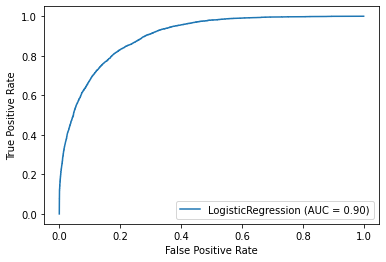

In [67]:
## plotting roc auc curve to check how much variance is explained by the model

plot_roc_curve(LR_model,X=xtrain,y=ytrain)

In [68]:
### Getting confusion matrix, F-score on the train data #####

print(confusion_matrix(y_true = ytrain, y_pred = LR_model.predict(xtrain))) ### confusion matrix for pred on train set

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=ytrain,y_pred = LR_model.predict(xtrain),sample_weight = ytrain))

[[12690  3130]
 [  858  4160]]
The F1-SCORE on the train set prediction  0.9065155807365439


In [69]:
##### Lets evaluate the performace on the validation set #####
print(yval.value_counts())

predicted_test = LR_model.predict(xval)

print (confusion_matrix(y_true = yval, y_pred = predicted_test))

print ('The F1-SCORE on the test set prediction ',f1_score(y_true=yval,y_pred = predicted_test,sample_weight = yval))

0    3955
1    1255
Name: Y, dtype: int64
[[3191  764]
 [ 230 1025]]
The F1-SCORE on the test set prediction  0.8991228070175439


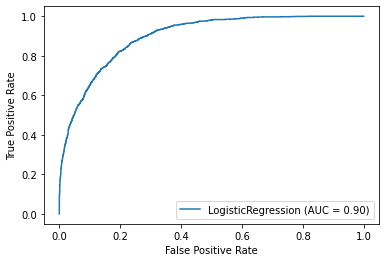

In [70]:
## plotting the roc and auc curve for validation set

plot_roc_curve(LR_model,X =xval, y= yval)

In [71]:
## SINCE OUR VALIDATION PREDICTION IS HAVING A GOOD SCORE , WE CAN GO WITH THIS MODEL AND DO PREDICTION ON TEST DATA  ####

In [72]:
####TEST prediction

testpredict= LR_model.predict_proba(tst)

In [73]:
testdf=pd.DataFrame(testpredict)

In [74]:
testdf['Row_ID']=testdf.index

In [75]:
testdf

,0,1,Row_ID
0,0.910870,0.089130,0
1,0.001022,0.998978,1
2,0.577583,0.422417,2
3,0.911337,0.088663,3
4,0.103106,0.896894,4
...,...,...,...
6508,0.684950,0.315050,6508
6509,0.109779,0.890221,6509
6510,0.522526,0.477474,6510
6511,0.964199,0.035801,6511


In [76]:
testdf.to_csv('testing_predictions.csv')  ## CONVERTING dataframe into csv file

In [77]:
testhardclass=LR_model.predict(tst)  ## checking hard classes

In [78]:
pd.DataFrame(testhardclass)

,0
0,0
1,1
2,0
3,0
4,1
...,...
6508,0
6509,1
6510,0
6511,0


In [79]:
## as per the format of submission file, doing changes

tsting=pd.read_excel('testing_predictions_new.xlsx')

In [80]:
tsting

In [81]:
tsting['Class']= np.where(tsting['Probability']>0.5,'>50K','<=50K')  # imputing values in class column whether preddiction is '>50K','<=50K' on basic of prob.

In [82]:
tsting.to_csv('Vikas_submission_0.csv')  ## final submission and converting to csv

In [83]:
#############************** WILL CHECK ON DECISION TREES AND RANDOM FOREST AND THEN ON NN AND XGBOOST *************########################
#                                                     THANK YOU